In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 10)

from importlib import reload

import sys
sys.path.append('.')
import lib as l

In [3]:
reload(l)
data = l.load_data()
dgs = data['generics']
print("CRAWL INFO:\n{} crawls\nFrom {} to {}\n{} errors".format(dgs['crawl_nb'], dgs['crawl_from'], dgs['crawl_to'], dgs['crawl_err_nb']))


Questions :
- Prix constants par représentation et par catégorie
- Distribution des prix par jour de la semaine
    - single show: plot prices as function of weekday
    - do stats for all opera/ballet shows

In [4]:
shows

,id,slug,type,title,author,location,saleStartDate,saleOpen,startDate,endDate,runlength,performances,presale_time
32,33,robbins-balanchine-cherkaoui-jalet,ballet,"robbins /​ balanchine /​ cherkaoui, jalet",None,Palais Garnier,None,True,2017-05-02,2017-05-27,25 days,5,NaT
41,42,bertaud-bouche-paul-valastro,ballet,Bertaud /​ bouché /​ paul /​ valastro,None,Palais Garnier,None,True,2017-06-13,2017-06-18,5 days,4,NaT
35,36,drumming-live,ballet,anne teresa de keersmaeker,Drumming Live,Opéra Bastille,None,True,2017-07-01,2017-07-15,14 days,10,NaT
42,43,la-sylphide,ballet,la sylphide,Pierre Lacotte,Palais Garnier,None,True,2017-07-01,2017-07-16,15 days,11,NaT
31,32,gala,ballet,Gala,Ouverture de la saison de danse,Palais Garnier,None,True,2017-09-21,2017-09-21,0 days,1,NaT
29,30,joyaux,ballet,joyaux,George Balanchine,Palais Garnier,2017-05-30,True,2017-09-22,2017-10-12,20 days,15,115 days
34,35,balanchine-teshigawara-bausch,ballet,Balanchine /​ teshigawara /​ bausch,None,Palais Garnier,2017-06-13,False,2017-10-25,2017-11-16,22 days,13,134 days
26,27,play,ballet,Play,None,Palais Garnier,2017-06-20,False,2017-12-06,2017-12-31,25 days,19,169 days
25,26,demonstrations-de-lecole-de-danse,ballet,démonstrations de lécole de danse,None,Palais Garnier,2017-11-07,False,2017-12-10,2017-12-23,13 days,6,33 days
27,28,don-quichotte,ballet,don quichotte,Rudolf Noureev,Opéra Bastille,2017-06-20,False,2017-12-11,2018-01-06,26 days,18,174 days


In [29]:
s17opera = shows[shows.apply(lambda x: x.saleStartDate is not None and x.type == 'opera', axis=1)].copy()
s17ballet = shows[shows.apply(lambda x: x.saleStartDate is not None and x.type == 'ballet', axis=1)].copy()

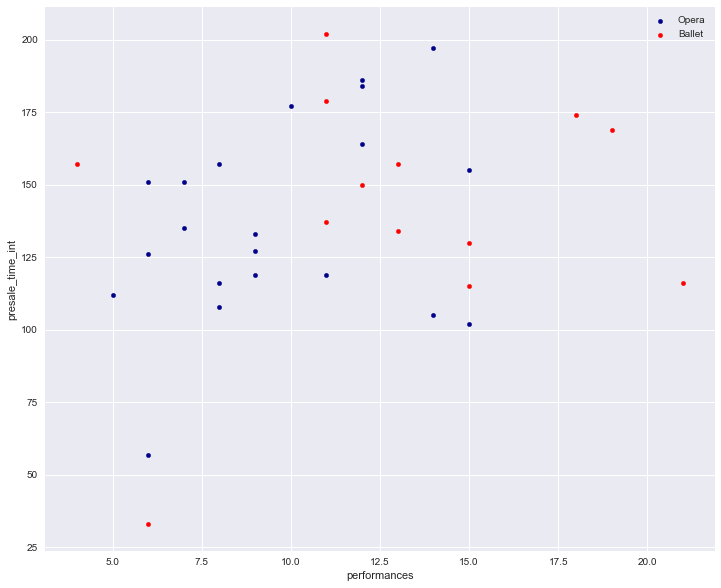

In [45]:
s17opera['presale_time_int'] = s17opera.presale_time.apply(lambda x: x.days)
s17ballet['presale_time_int'] = s17ballet.presale_time.apply(lambda x: x.days)
ax = s17opera.plot.scatter(x='performances', y='presale_time_int', color='DarkBlue', label='Opera');
s17ballet.plot.scatter(x='performances', y='presale_time_int', color='Red', label='Ballet', ax=ax);

# Sans rapport vraiment. avec le nombre de performances ...